In [1]:
import zipfile
import os

In [3]:
import zipfile
import os
zip_file_path = "Test_Images.zip"
extract_path = "Images"
os.makedirs(extract_path, exist_ok=True)
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
print("Files extracted to:", extract_path)

Files extracted to: Images


In [4]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('Images/Test_Images/Lena_Image.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


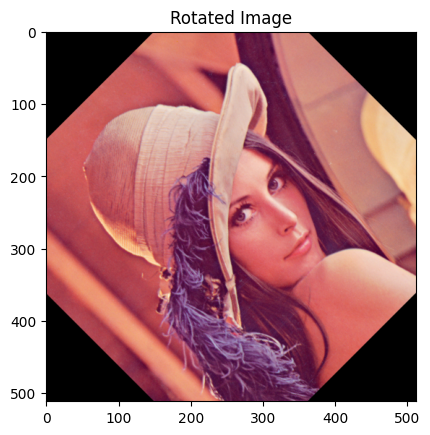

In [5]:
rows, cols = img.shape[:2]
M = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1)
rotated = cv2.warpAffine(img, M, (cols, rows))
plt.imshow(rotated)
plt.title('Rotated Image')
plt.show()


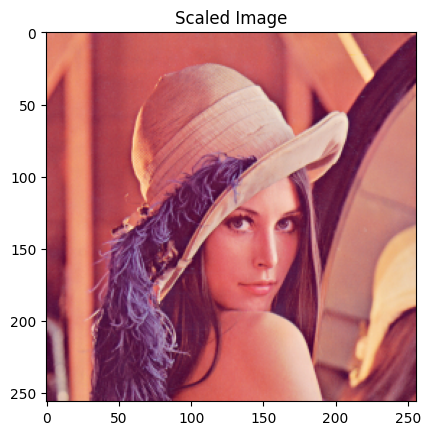

In [6]:
scaled = cv2.resize(img, None, fx=0.5, fy=0.5)
plt.imshow(scaled)
plt.title('Scaled Image')
plt.show()


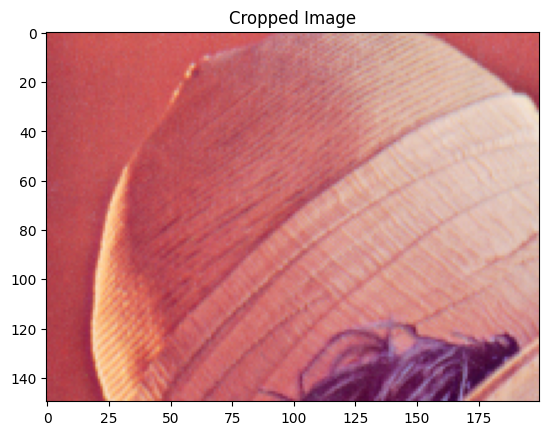

In [7]:
cropped = img[50:200, 100:300]
plt.imshow(cropped)
plt.title('Cropped Image')
plt.show()


In [8]:
#EXPERIMENT 2

In [9]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
split_idx = int(0.8 * len(x_train))
x_train, x_valid = x_train[:split_idx], x_train[split_idx:]
y_train, y_valid = y_train[:split_idx], y_train[split_idx:]
y_train = to_categorical(y_train, 10)
y_valid = to_categorical(y_valid, 10)
y_test = to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=10, batch_size=32)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8661 - loss: 0.4548 - val_accuracy: 0.9568 - val_loss: 0.1483
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9635 - loss: 0.1205 - val_accuracy: 0.9668 - val_loss: 0.1099
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9756 - loss: 0.0797 - val_accuracy: 0.9701 - val_loss: 0.0992
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9832 - loss: 0.0560 - val_accuracy: 0.9714 - val_loss: 0.1017
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9864 - loss: 0.0430 - val_accuracy: 0.9728 - val_loss: 0.0918
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9883 - loss: 0.0352 - val_accuracy: 0.9721 - val_loss: 0.1018
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9906 - loss: 0.0268 - val_accuracy: 0.9662 - val_loss: 0.1324
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9915 - loss: 0.0235 -

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9718 - loss: 0.1065
Test Accuracy: 0.97
